In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

### Define System Paramaters:

In [2]:
m1 = 1
m2 = 1
w1 = 1.28
w2 = 1.39
epsilon = 0.415

### Define system DEs as function:

In [3]:
def Hamiltonian(t, x):    
        
    return [
        x[2],  # d(q_1)/dt
        x[3],  # d(q_2)/dt
        -(2*epsilon/m1)*x[0]*x[1] - (w1**2)*x[0],  # d(v_1)/dt
        -(epsilon/m2)*((x[0]**2)-(x[1]**2)) - (w2**2)*x[1]  # d(v_1)/dt
    ]

### Define time range and initial conditions:

In [4]:
dt = 0.01
t_test = np.arange(0,100,dt)
X0 = [1.1, 1.2, 1.3, 1.4]

### Solve our equations using solve_ivp

In [5]:
sol = solve_ivp(Hamiltonian, (t_test[0], t_test[-1]), X0, method='BDF', t_eval=t_test) # Integrate
x_test = np.transpose(sol.y)

### Plot:

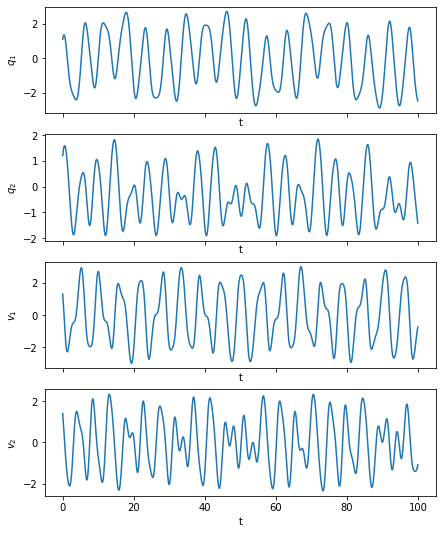

In [6]:
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7,9))
plt.rc('axes', labelsize=15)
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i])
    axs[i].set(xlabel='t', ylabel=['$q_1$','$q_2$','$v_1$','$v_2$'][i])
    #axs[i].set_xlim(8,9)
    #axs[i].legend()

### 3D plotting of variables against eachother

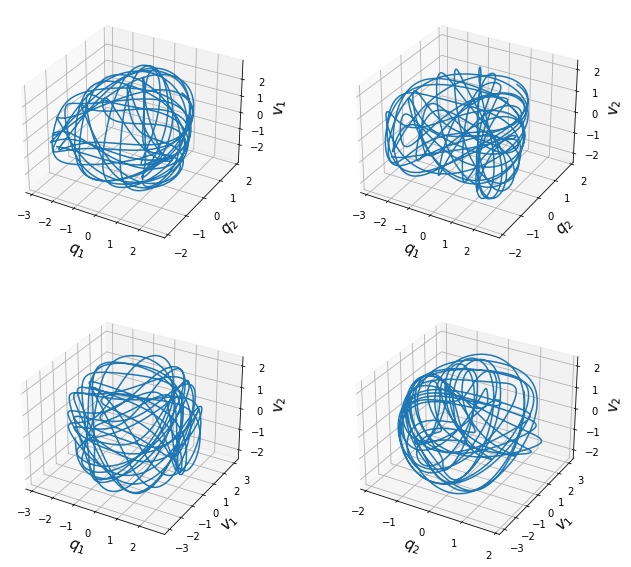

In [7]:
fig = plt.figure(figsize= (11, 10))

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2])
ax1.set(xlabel='$q_1$', ylabel='$q_2$', zlabel='$v_1$')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(x_test[:, 0], x_test[:, 1], x_test[:, 3])
ax2.set(xlabel='$q_1$', ylabel='$q_2$', zlabel='$v_2$')

ax4 = fig.add_subplot(223, projection='3d')
ax4.plot(x_test[:, 0], x_test[:, 2], x_test[:, 3])
ax4.set(xlabel='$q_1$', ylabel='$v_1$', zlabel='$v_2$')

ax7 = fig.add_subplot(224, projection='3d')
ax7.plot(x_test[:, 1], x_test[:, 2], x_test[:, 3])
ax7.set(xlabel='$q_2$', ylabel='$v_1$', zlabel='$v_2$');


<IPython.core.display.Javascript object>


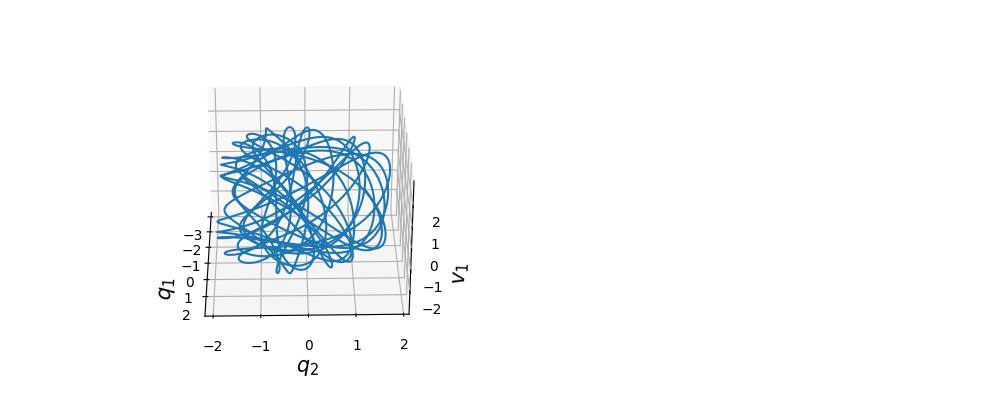

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2])
ax1.set(xlabel='$q_1$', ylabel='$q_2$', zlabel='$v_1$');

#ax2 = fig.add_subplot(122, projection='3d')
#ax2.plot(x_test[:, 1], x_test[:, 0], x_test[:, 4])
#ax2.set(xlabel='$\u03C6_e$', ylabel='$\u03C6_m$', zlabel='n')

# Create an rotatable 3D plot: 
for angle in range(0, 360):
    ax1.view_init(30, angle)
    ax2.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

### 2D plotting of variables against eachother

In [9]:
'''
fig, axs = plt.subplots(3, 2, figsize=(10,10))
plt.rc('axes', labelsize=15)

axs[0,0].plot(x_test[:,1], x_test[:, 0])
axs[0,0].set(xlabel='$\u03C6_e$', ylabel='$I_e$')

axs[0,1].plot(x_test[:,3], x_test[:, 2])
axs[0,1].set(xlabel='$\u03C6_m$', ylabel='$I_m$')

axs[1,0].plot(x_test[:,0], x_test[:, 2])
axs[1,0].set(xlabel='$I_e$', ylabel='$I_m$')

axs[1,1].plot(x_test[:,1], x_test[:, 3])
axs[1,1].set(xlabel='$\u03C6_e$', ylabel='$\u03C6_m$')

axs[2,0].plot(x_test[:,0], x_test[:, 4])
axs[2,0].set(xlabel='$I_e$', ylabel='n')

axs[2,1].plot(x_test[:,2], x_test[:, 4])
axs[2,1].set(xlabel='$I_m$', ylabel='n')


fig.tight_layout(h_pad=2)

SyntaxError: EOF while scanning triple-quoted string literal (3422110163.py, line 24)